# Machine Learning with Fashion-MNIST datasets
By: Wong Jia Hau (1500181)

## Loading the datasets
If you don't know how to load file in Python, no worries, because the author of this datasets have already provided a data loader for us. 
Let us use the provided loader.

In [12]:
from utils import mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

The loader does not only helps us to load the data into the kernel, it also help us to do the following:
 - flattening data ( for machine learning purpose )
 - partitioning data into training and testing set

In [153]:
print(X_train[0].shape)

(784,)


We can see that the shape of each data is a 1x784 matrix, so it is already flattenized.

In [238]:
x_train_len = len(X_train)
x_test_len = len(X_test)
total = x_train_len + x_test_len
print("Number of training data is", x_train_len)
print("Number of testing data is", x_test_len)
print("Total number of data is ", total)
training_data_percentage = (x_train_len/total*100)
testing_data_percentage = 100 - training_data_percentage
print(f"So there are {training_data_percentage:2.3}% of data is training data")
print(f"And {testing_data_percentage:2.3}% of data is testing data")

Number of training data is 60000
Number of testing data is 10000
Total number of data is  70000
So there are 85.7% of data is training data
And 14.3% of data is testing data


## Let's define the benchmarking function
After that we can use this benchmarking function to benchmark various classifiers to see their accuracy, training time and predicting performance.

In [122]:
import matplotlib.pyplot as plt
import numpy as np

def get_accuracy(predicted, actual):
    accuracy = (predicted == actual).sum() / len(actual) * 100
    return accuracy

def benchmark(classifier, training_data=X_train, test_data=X_test):
    from datetime import datetime
    time1 = datetime.now()
    cls = classifier()
    name = cls.__class__.__name__
    cls.fit(training_data, y_train)
    time2 = datetime.now()
    training_time = time2 - time1
    predicted = cls.predict(test_data)
    time3 = datetime.now()
    predicting_time = time3 - time2
    accuracy = get_accuracy(predicted, y_test)
    return {
        "classifier" : name,
        "training_time" : training_time, 
        "predicting_time" :predicting_time, 
        "accuracy" : accuracy
    }

def print_benchmark_result(result):
    print("Training data using ", result["classifier"])
    print("Time elapsed for training   = ", result["training_time"])
    print("Time elapsed for prediction = ", result["predicting_time"])
    print(f"Accuracy of is {result['accuracy']}%")

# Visualizing the data
As mentioned in README, all data are in 28x28 pixels, therefore we need to reshape the data into (28, 28).

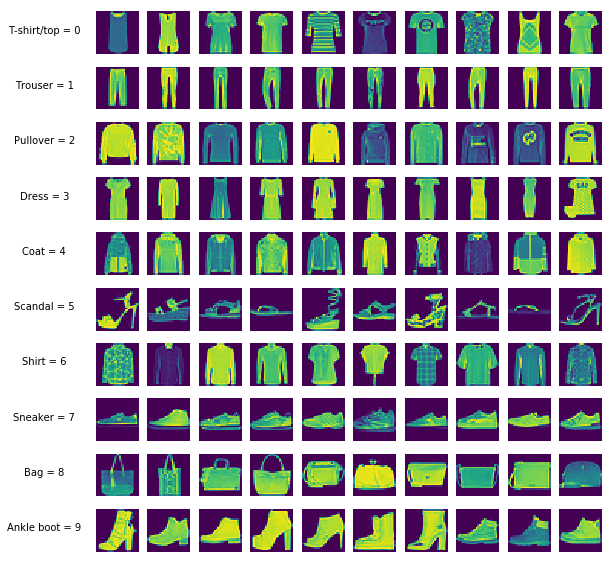

In [40]:
# The lables can be obtain from README.md
LABELS = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Scandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

label_indexes = []
for i in range(0, 10):
    label_indexes.append(
        [index for index, value in enumerate(y_train) if value == i]
    );
fig = plt.figure(figsize=(10, 10))
columns = 10 + 1
rows = 10
for i, labels in enumerate(label_indexes):
    for j in range(columns):
        ax = fig.add_subplot(rows, columns, i * columns + j + 1)
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)
        ax.axis('off')
        if j == 0:
            ax.text(0, 0.5,  f'{LABELS[i]} = {i}', horizontalalignment='center')
            continue
        plt.imshow(X_train[labels[j]].reshape(28, 28))
plt.axis('off')
plt.show()


# Training using different classifier
In this section we will train the data using some popular classifier and benchmark their performance and accuracy.  
**NOTE** : We will use the default parameter for each classifier.

In [128]:
from sklearn.neighbors import KNeighborsClassifier
r_KNeighborsClassifier = benchmark(KNeighborsClassifier)
print_benchmark_result(r_KNeighborsClassifier)

Training data using  KNeighborsClassifier
Time elapsed for training   =  0:00:14.038836
Time elapsed for prediction =  0:11:43.232018
Accuracy of is 85.54%


In [129]:
from sklearn.tree import DecisionTreeClassifier
r_DecisionTreeClassifier = benchmark(DecisionTreeClassifier)
print_benchmark_result(r_DecisionTreeClassifier)

Training data using  DecisionTreeClassifier
Time elapsed for training   =  0:00:41.994189
Time elapsed for prediction =  0:00:00.014370
Accuracy of is 79.39%


In [130]:
from sklearn.naive_bayes import GaussianNB
r_GaussianNB = benchmark(GaussianNB)
print_benchmark_result(r_GaussianNB)

Training data using  GaussianNB
Time elapsed for training   =  0:00:00.586267
Time elapsed for prediction =  0:00:00.560041
Accuracy of is 58.56%


In [131]:
from sklearn.neural_network import MLPClassifier
r_MLPClassifier = benchmark(MLPClassifier)
print_benchmark_result(r_MLPClassifier)

Training data using  MLPClassifier
Time elapsed for training   =  0:00:56.869004
Time elapsed for prediction =  0:00:00.063153
Accuracy of is 84.73%


In [205]:
from sklearn.ensemble import RandomForestClassifier
r_RandomForestClassifier = benchmark(RandomForestClassifier)
print_benchmark_result(r_RandomForestClassifier)

Training data using  RandomForestClassifier
Time elapsed for training   =  0:00:08.481590
Time elapsed for prediction =  0:00:00.057396
Accuracy of is 85.6%


In [133]:
from sklearn.ensemble import AdaBoostClassifier
r_AdaBoostClassifier = benchmark(AdaBoostClassifier)
print_benchmark_result(r_AdaBoostClassifier)

Training data using  AdaBoostClassifier
Time elapsed for training   =  0:01:42.783670
Time elapsed for prediction =  0:00:00.388631
Accuracy of is 54.25%


In [134]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
r_QuadraticDiscriminantAnalysis = benchmark(QuadraticDiscriminantAnalysis)
print_benchmark_result(r_QuadraticDiscriminantAnalysis)

/home/hou32hou/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Training data using  QuadraticDiscriminantAnalysis
Time elapsed for training   =  0:00:07.518209
Time elapsed for prediction =  0:00:02.282679
Accuracy of is 56.410000000000004%


### Side notes
There are actually another popular classifier called `GaussianProcessClassifier`. However this classifier is a memory beast, thus I can't even run the classifier even I have 8GB of RAM.  *However, there are actually some hack to get around with this, but I'm just not sure how to apply it.*

# Graph for comparing various classifiers

In [150]:
def plot_graph(x_title, x_labels, title, benchmark_results):
    accuracies = [x["accuracy"] for x in benchmark_results]
    training_times = [x["training_time"].total_seconds() for x in benchmark_results]
    predicting_times = [x["predicting_time"].total_seconds() for x in benchmark_results]
    
    x_pos = np.arange(len(x_labels))
    
    # Plot accuracy
    fig , ax1 = plt.subplots()
    fig.set_size_inches(8, 8)
    ax1.set_title(title)
    ax1.set_ylabel('Accuracies(%)')
    ax1.set_xlabel(x_title)
    ax1.bar(x_pos, accuracies, label='Accuracy')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(x_labels, rotation=90)


    # Plot training time
    ax2 = ax1.twinx()
    ax2.set_ylabel('Time (seconds)')
    ax2.plot(training_times, color="red", label='Training time', linewidth=5.0)

    # Plot predicting time
    ax2.plot(predicting_times, color="yellow", label="Predicting time", linewidth=5.0)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=3)
    plt.show()
    print(f"Average training time is {sum(training_times)/len(training_times):2.3}s")
    print(f"Average accuracy is {sum(accuracies)/len(accuracies):2.3}%")

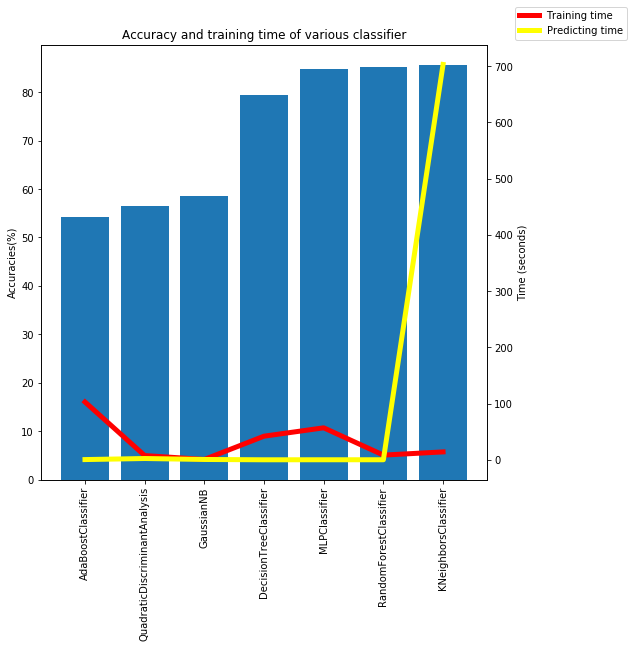

Average training time is 33.2s
Average accuracy is 72.0%


In [151]:
from operator import itemgetter
benchmark_results = sorted([
    r_KNeighborsClassifier,
    r_DecisionTreeClassifier,
    r_GaussianNB,
    r_MLPClassifier,
    r_RandomForestClassifier,
    r_AdaBoostClassifier,
    r_QuadraticDiscriminantAnalysis
], key=itemgetter('accuracy'))
classifiers = [x["classifier"] for x in benchmark_results]
plot_graph("", classifiers, "Accuracy and training time of various classifier", benchmark_results)

## What can we say about the graph?
From the graph above we can see that the classifier with the best accuracy is KNeighbors, but we can see that it is using a horrific 700s for predicting test data (over 11 minutes！). On the contrary, all of the other classifier take less than 10s to do the prediction.  
This is because there are actually no training is done for KNeighborsClassifier, all it do is comparing each test data against every train data, thus the terrific predicting time. Meanwhile, the other classifier is really building a model when trained with the data, thus their predicting time is lightning fast.

## Conclusion
From my point of view, I thought that the RandomForestClassifier is the best in this situation, because it have top accuracy, and one of the least training time and predicting time. **But does that means RandomForest is good for every case?** *The answer is NO.* It reallys depends on how your data looks like. Just like spoon is good for taking soup, while chopstick is good for grabbing veges. We cannot say that spoon is better than chopstick or vice versa. In the same way, we cannot say some classifier is always better than the other classifier.



# *Time to tune some classifiers*!
In this section, we will play with the parameters of the following classifier:
- MLP (Multi-layer Preceptron / neural network)
- RandomForest

We will change their default parameter to see if we can get better results.  
**P/S** : *I chose MLP because I thought it's name is quite interesting.*

## MLP Classifier
For this classifier we will see if the number of hidden layers can affect the performance of the MLPClassifier.

In [331]:
from sklearn.neural_network import MLPClassifier
def hidden_layer(n):
    return lambda: MLPClassifier(hidden_layer_sizes=(n,))

hidden_layer_counts = np.arange(10, 130, 5)

results = []
for n in hidden_layer_counts:
   results.append(benchmark(hidden_layer(n)))



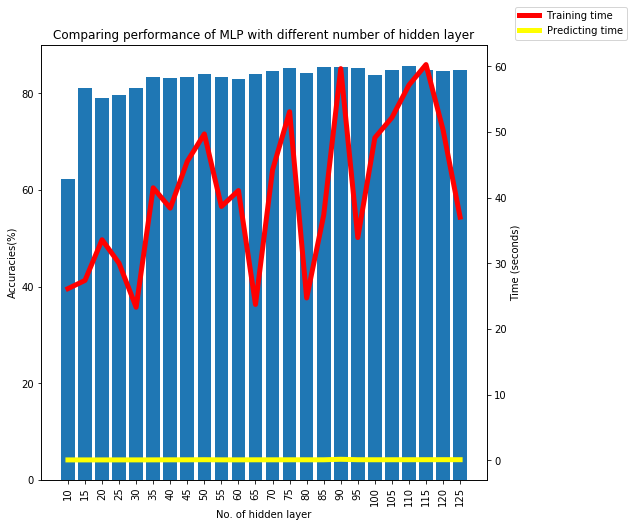

Average training time is 40.7s
Average accuracy is 82.8%
Best accuracies is 85.78 when no. of hidden layer is 110
Best training time is 23.290041 when no. of hidden layer is 30


In [373]:
CUT_POINT = 82
filtered_results = [x for x in results if x["accuracy"] > CUT_POINT]
filtered_hidden_layer_counts = [x for idx, x in enumerate(hidden_layer_counts) if results[idx]["accuracy"] > CUT_POINT ]


plot_graph("No. of hidden layer", hidden_layer_counts, "Comparing performance of MLP with different number of hidden layer", results)

print(f"Best accuracies is {np.max(accuracies)} when no. of hidden layer is {hidden_layer_counts[np.argmax(accuracies)]}")
print(f"Best training time is {np.min(training_times)} when no. of hidden layer is {hidden_layer_counts[np.argmin(training_times)]}")

As we can see from the graph, the training time does not have really strong relation to the number of hidden layer(NOHL). 
In fact, I had personally run the training for 3 times, but the result is different for each training, sometimes even contradicting.  
In the first trial, the best training time is when NOHL = 100.   
But in the 2nd trial, the worse training time is also when the NOHL = 100.  
I think this might be due to the fact that MLP have some internal algorithm which includes random numbers.  Since they want to mimic the randomness of nature.

## Random Forest Classifier
For this classifier we will play with the parameter `n_estimators` and `critertion`.  
By default, `n_estimators = 10` and `criterion = 'gini'`.

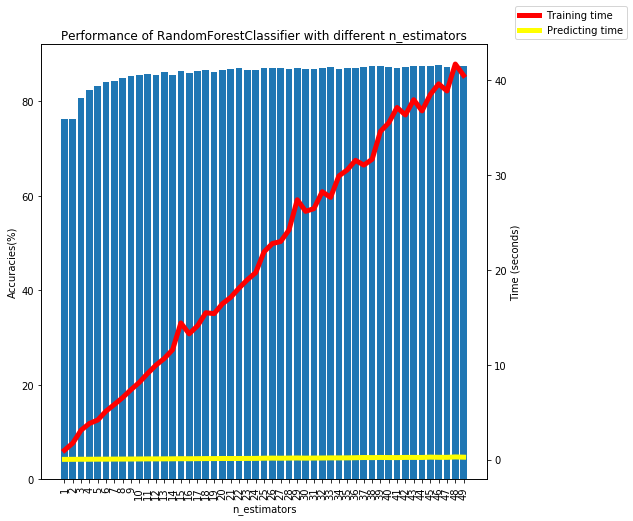

Average training time is 21.4s
Average accuracy is 85.9%


In [375]:
from sklearn.ensemble import RandomForestClassifier
def randomForest(N_estimators):
    return lambda: RandomForestClassifier(n_estimators=N_estimators)

benchmark_results = [benchmark(randomForest(i)) for i in range(1, 50)]
plot_graph("n_estimators", range(1, 50), "Performance of RandomForestClassifier with different n_estimators", 
           benchmark_results)

From the graph above, we can see that there is a strong positive relation between `n_estimators` with `training_time`. However, we can see that increasing `n_estimators` does did not actually raise the accuracy.  No wonder `sklearn` defaulted the value of `n_estimators` to 10.  Thus, brutally increasing `n_estimators` will only results in waste of time.

### Now, let us try with `criterion = 'entropy'`

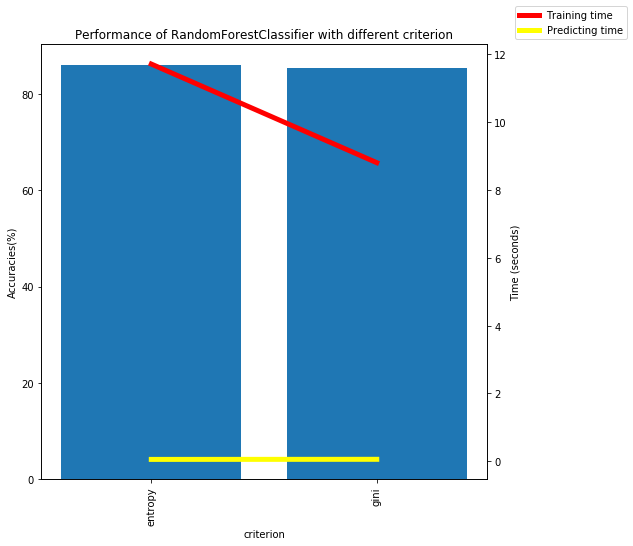

Average training time is 10.3s
Average accuracy is 85.7%


In [376]:
results = [
    benchmark(lambda: RandomForestClassifier(criterion='entropy')),
    benchmark(lambda: RandomForestClassifier(criterion='gini'))
]
plot_graph("criterion", ['entropy', 'gini'], "Performance of RandomForestClassifier with different criterion", results)


From the graph we can see that the accuracy difference is not much, but obviously the training time is longer when we use `entropy` as the criterion. I think is this may be the reason why `gini` is the default criterion.

# Confusion matrices
In this section, we will be using MLPClassifier(with default parameters) to plot a confusion matrix to visualize what kind of data is confusing the classifier.

In [347]:
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

cls = MLPClassifier()
cls.fit(X_train, y_train)
predicted = cls.predict(X_test)
cf = confusion_matrix(y_test, predicted)

In [366]:
# The code below is copied from https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
def plot_confusion_matrix(conf_arr, labels):
    norm_conf = []
    for i in conf_arr:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j)/float(a))
        norm_conf.append(tmp_arr)

    fig = plt.figure()
    fig.set_size_inches(10, 10)
    plt.clf()
    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                    interpolation='nearest')

    
    width, height = conf_arr.shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')

    cb = fig.colorbar(res)
    ax.set_xticklabels(labels, rotation=90)
    plt.xticks(range(width), labels)
    plt.yticks(range(height), labels)
    plt.show()

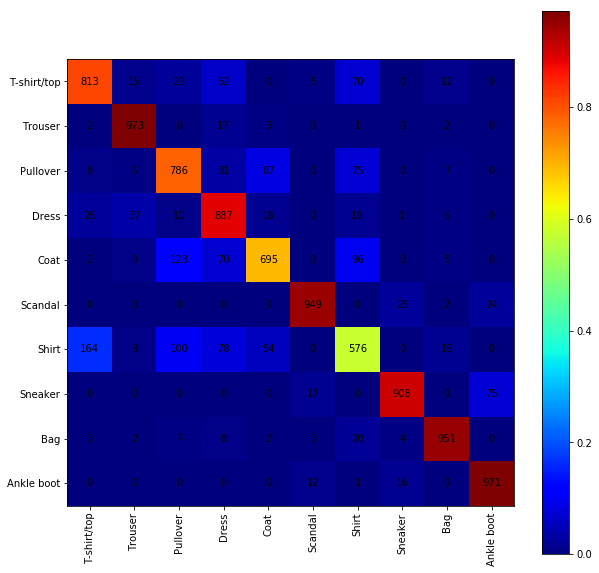

In [368]:
plot_confusion_matrix(cf, list(LABELS.values()))

From the confustion matrix above, *by analyzing the rows*, we can see that the prediction for Shirt is the worse, because about 50% of the data is mistaken as T-shirt, Pullover, Dress or Coat.  
Moreover, we can see that there 164 Shirt mispredicted as T-shirt. To be honest, even my eyes got confused between T-shirt and Shirt.  
Now, if we analyze the matrix by *columns*, we can see that if we are told by the classifier that a data represent a Shirt, we can't really trust it, because it mispredicted: 
    - 70 T-shirt as Shirt
    - 75 Pullover as Shirt
    - 96 Coat as Shirt
    
Therefore, we have to find a way for the classifier to learn specifically on how to differentiate Shirt from others since it is always confused with it.

## So, is there a way to fix this?
One approach is to retrain the classifier with those confusing data, but this method does not seems really efficient.  
Another method is to preprocess the data such as using normalization. By doing preprocessing, the data might be in a  better shape for classification.

## Preprocessing : Normalizing data

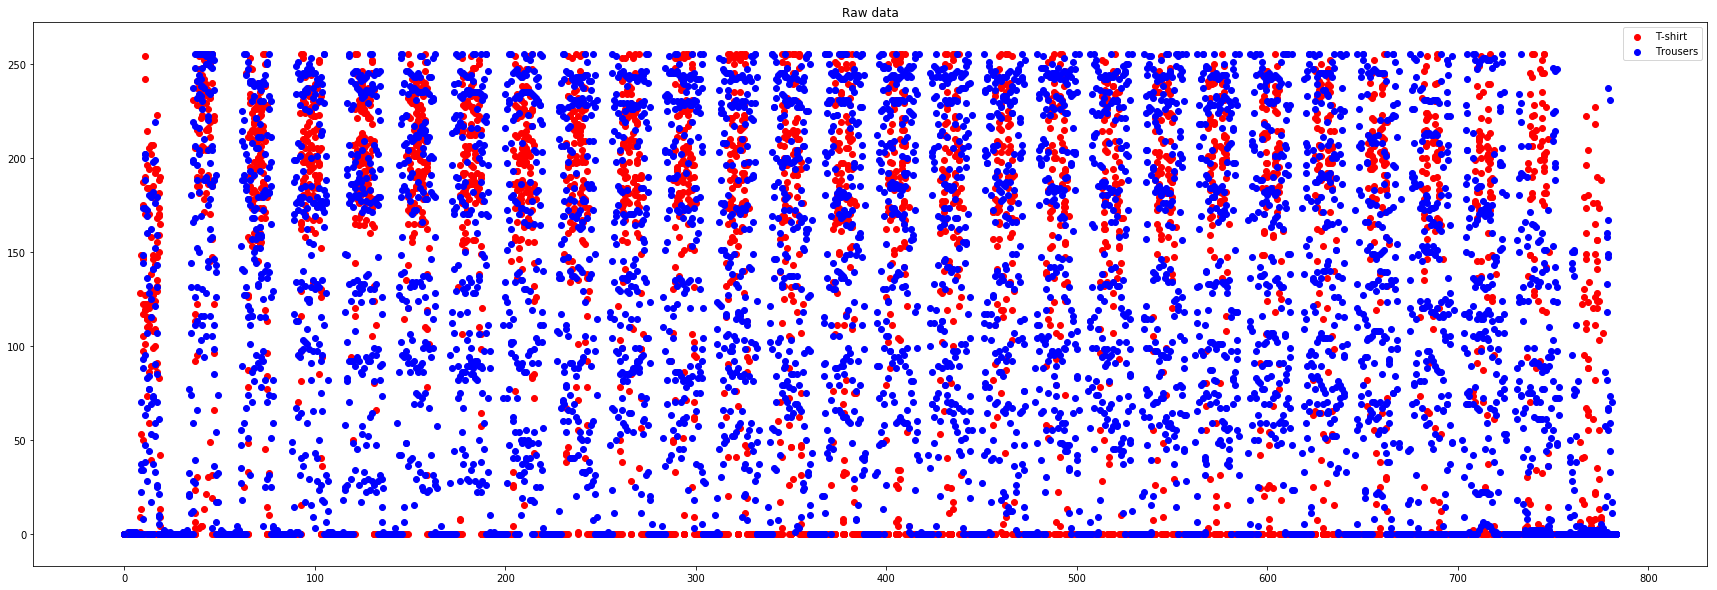

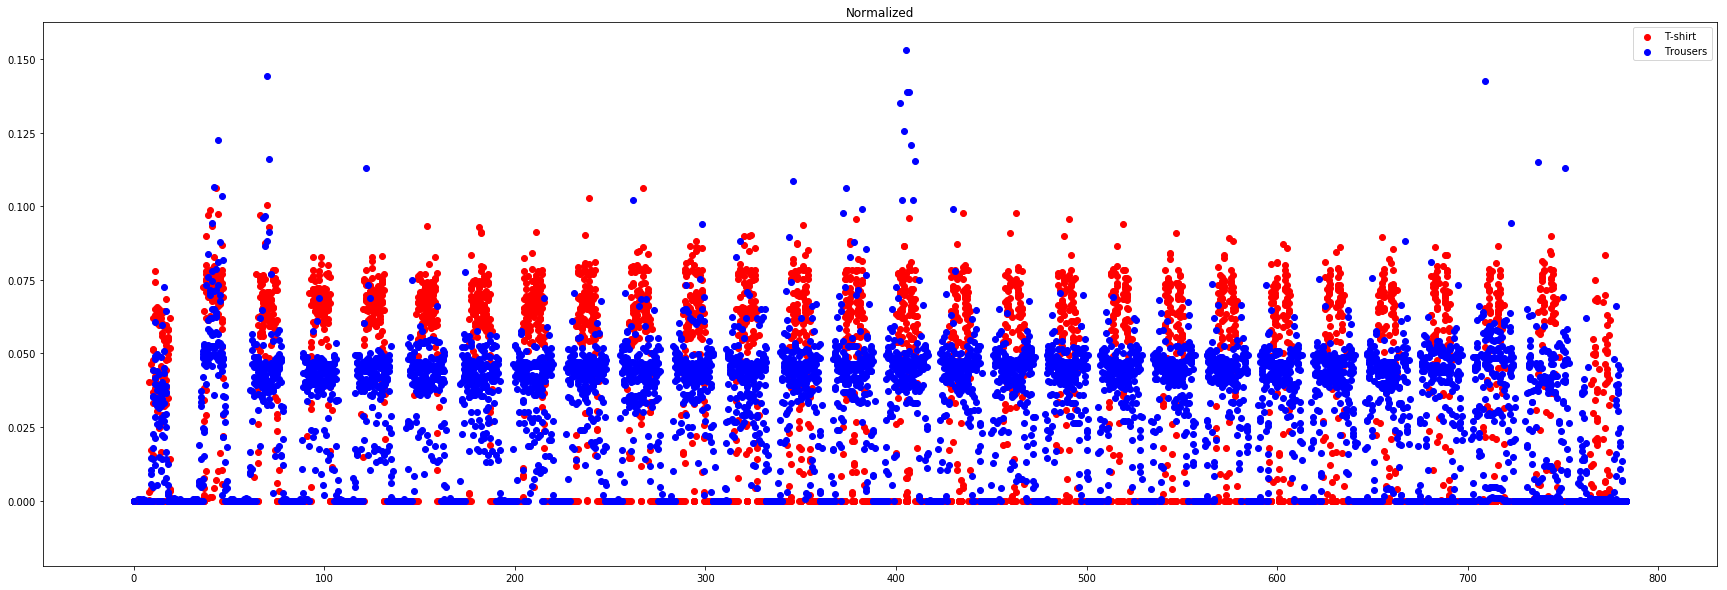

In [119]:
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt

def plot_pixels(title, normalizer=None): 
    sample_x = X_train[1:100]
    sample_y = y_train[1:100]
    colors = ['red', 'blue']
    for i in [1, 2]:
        sample = sample_x[np.argwhere(sample_y == i).flatten()]
        if normalizer is not None:
            sample = n.transform(sample)
        for x in sample:
            plt.scatter(range(len(x)), x, color=colors[i - 1])
        plt.gcf().set_size_inches(30, 10)
        plt.title(title)
   
    line1 = plt.scatter([0, 0], [0, 0], color='red')
    line2 = plt.scatter([0, 0], [0, 0], color='blue')
    plt.legend((line1, line2), ('T-shirt', 'Trousers'))
    plt.show()

plot_pixels("Raw data")
plot_pixels("Normalized", Normalizer())

From the graph above, we can see that in raw data, it is quite hard to differentiate the pixels between T-shirt and Trousers. However, after we apply normalization on the data, we can see that it is easier to do the differentiation.  
Thus, we may hypothesize that the classifier can work better if they were trained with normalized data.

## Training classifier with preproccessed data
In this case we will try to train the RandomForestClassifier with data preprocessed by various preprocessors.

In [146]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.ensemble import RandomForestClassifier

def train(preprocessor=None):
    my_X_train = X_train
    my_X_test = X_test
    if preprocessor is not None:
        my_X_train = preprocessor().fit_transform(X_train, y_train)
        my_X_test  = preprocessor().fit_transform(X_test, y_test)
    return benchmark(RandomForestClassifier, my_X_train, my_X_test)

r1 = train()
r2 = train(Normalizer)
r3 = train(MinMaxScaler)
r4 = train(MaxAbsScaler)
r5 = train(StandardScaler)
r6 = train(RobustScaler)

/home/hou32hou/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/hou32hou/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


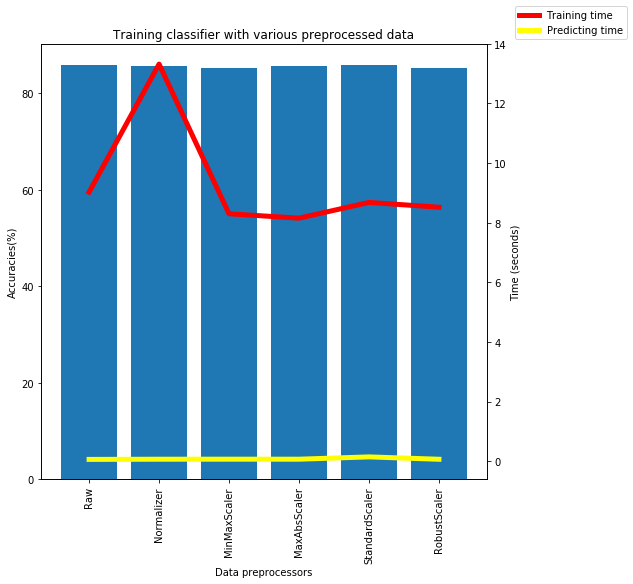

Average training time is 9.33s
Average accuracy is 85.6%


In [152]:
benchmark_results = [r1, r2, r3, r4, r5, r6] 
plot_graph("Data preprocessors", [
    "Raw",
    "Normalizer",
    "MinMaxScaler",
    "MaxAbsScaler",
    "StandardScaler",
    "RobustScaler"
], "Training classifier with various preprocessed data", benchmark_results)

Unfortunately, from the graph, our hypothesis is not really true (when using RandomForestClassifier), because the accuracy doesn't seems to improve even if we train that classifier with preprocessed data.   Moreover, if the data is preprocess with Normalizer the, training time increases by more than 50%.

## Now let's try to build a customized classifier
In this section, I will attempt to build a customized classifier that is only meant to tackle this datasets.  
If you can recall the Confusion Matrix, we can see that T-shirt is always confused with Shirts, so what I will do now is to equate them first.

In [206]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
tuned_y_train = np.array(y_train, copy=True)
tuned_y_test = np.array(y_test, copy=True)

# Set label of Shirt(6) to be T-Shirt(0) 
tuned_y_train[tuned_y_train == 6] = 0
tuned_y_test[tuned_y_test == 6] = 0

general_cls = RandomForestClassifier()
general_cls.fit(X_train, tuned_y_train)
predicted = general_cls.predict(X_test)

accuracy = accuracy_score(tuned_y_test, predicted)
precision = precision_score(tuned_y_test, predicted, average='weighted')

print(accuracy)
print(precision)

0.8799
0.880147379844


In [202]:
def extract(X_data, y_data):
    tshirt = X_data[np.argwhere(y_data == 0).flatten()]
    shirt = X_data[np.argwhere(y_data == 6).flatten()]

    tshirt_labels = np.repeat(0, len(tshirt))
    shirt_labels = np.repeat(6, len(shirt))
    custom_x = np.concatenate([tshirt, shirt])
    custom_y = np.concatenate([tshirt_labels, shirt_labels])

    return custom_x, custom_y

custom_x_train, custom_y_train = extract(X_train, y_train)
custom_x_test, custom_y_test = extract(X_test, y_test)



tshirt_and_shirt_cls = RandomForestClassifier()
tshirt_and_shirt_cls.fit(custom_x_train, custom_y_train)
predicted = tshirt_and_shirt_cls.predict(custom_x_test)

accuracy = accuracy_score(custom_y_test, predicted)
print(accuracy)


0.8395


In [209]:
def myPredictor(xs):
    predicted = []
    for x in xs:
        result = general_cls.predict([x])
        if result == [0]:
            result = tshirt_and_shirt_cls.predict([x])
        predicted.append(result[0])
    return predicted

In [210]:
predicted_results = myPredictor(X_test)
accuracy = accuracy_score(y_test, predicted_results)
print(accuracy)

0.852
